In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Definition of Multiple Regression Model

class MultipleRegression:

    def __init__(self, dataset, x1label, x2label, ylabel):
        self.b0 = 0
        self.b1 = 0
        self.b2 = 0
        self.rmse = 0
        self.x1label = x1label
        self.x2label = x2label
        self.ylabel = ylabel
        self.dataset = dataset
        self.X1 = np.array(self.dataset[self.x1label]).reshape(-1, 1)
        self.X2 = np.array(self.dataset[self.x2label]).reshape(-1, 1)
        self.Y = np.array(self.dataset[self.ylabel]).reshape(-1, 1)
              
    def plotGraph(self):
        ax = plt.axes(projection='3d')
        x1_max = np.max(self.X1)
        x1_min = np.min(self.X1)
        x2_max = np.max(self.X2)
        x2_min = np.min(self.X2)
        x1 = np.linspace(x1_min, x1_max, 1000)
        x2 = np.linspace(x2_min, x2_max, 1000)
        y = self.b0 + self.b1 * x1 + self.b2 * x2
        ax.scatter3D(self.X1[0:100], self.X2[0:100], self.Y[0:100], c=self.Y[0:100])
        ax.plot3D(x1, x2, y, 'black')
        ax.set_zlabel('Burn Rate')
        ax.set_xlabel('Working Hours')
        ax.set_ylabel('Mental Fatigue Score')
        plt.show()
        
    def train(self):
        x1_mean = np.mean(self.X1)
        x2_mean = np.mean(self.X2)
        y_mean = np.mean(self.Y)
        n = len(self.X2)
        sum_x1sq = 0
        sum_x2sq = 0
        sum_x1y = 0
        sum_x2y = 0
        sum_x1x2 = 0
        for i in range(n):
            sum_x1sq += self.X1[i] * self.X1[i]
            sum_x2sq += self.X2[i] * self.X2[i]
            sum_x1y += self.X1[i] * self.Y[i]
            sum_x2y += self.X2[i] * self.Y[i]
            sum_x1x2 += self.X1[i] * self.X2[i]
        
        self.b1 = ( sum_x2sq * sum_x1y - sum_x1x2 * sum_x2y ) / ( sum_x1sq * sum_x2sq - sum_x1x2 * sum_x1x2 )
        
        self.b2 = ( sum_x1sq * sum_x2y - sum_x1x2 * sum_x1y ) / ( sum_x1sq * sum_x2sq - sum_x1x2 * sum_x1x2 )
 
        self.b0 = y_mean - self.b1 * x1_mean - self.b2 * x2_mean
 
        self.rmse = 0
        for i in range(n):
            y_pred=  self.b0 + self.b1 * self.X1[i] + self.b2 * self.X2[i] 
            self.rmse += (self.Y[i] - y_pred) ** 2
            
        self.rmse = np.sqrt(self.rmse/n)
    
    def predict(self, x1, x2):
        
        y = self.b0 + self.b1 * x1 + self.b2 * x2
        return y
    
    def score(self):
        n = len(self.X1)
        y_mean = np.mean(self.Y)
        sum_sq = 0
        sum_res = 0
        
        #print("score y =",x.b0,"+",x.b1,"X1","+",x.b2,"X2")
        for i in range(n) :
            y_pred = self.b0 + self.b1 * self.X1[i] + self.b2 * self.X2[i]
            sum_sq += (self.Y[i] - y_mean) ** 2
            sum_res += (self.Y[i] - y_pred) ** 2  
            score  = 1 - (sum_res/sum_sq)
            
        return score

In [3]:
#Definition of Linear Regression Model

class LinearRegression:
    def __init__(self, dataset, xlabel, ylabel):
        self.b0 = 0
        self.b1 = 0
        self.rmse = 0
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.dataset = dataset
        self.X = np.array(self.dataset[self.xlabel]).reshape(-1, 1)
        self.Y = np.array(self.dataset[self.ylabel]).reshape(-1, 1)
        
    def plotGraph(self):
        X = np.array(dataset[self.xlabel]).reshape(-1, 1)
        Y = np.array(dataset[self.ylabel]).reshape(-1, 1)
        plt.scatter(X[0:11],Y[0:11])
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.legend()
        plt.show()
        
    def train(self):
        x_mean = np.mean(self.X)
        y_mean = np.mean(self.Y)
        n = len(self.X)
        
        numerator = 0
        denominator = 0
        for i in range(n):
            numerator += (self.X[i] - x_mean) * (self.Y[i] - y_mean)
            denominator += (self.X[i] - x_mean) ** 2
            
        self.b1 = numerator / denominator
        self.b0 = y_mean - (self.b1 * x_mean)
        
        self.rmse = 0
        for i in range(n):
            y_pred=  self.b0 + self.b1* self.X[i]
            self.rmse += (self.Y[i] - y_pred) ** 2
        self.rmse = np.sqrt(self.rmse/n)
    
    def predict(self, x):
        y = self.b1 * x + self.b0
        return y
    
    def score(self):
        n = len(self.X)
        y_mean = np.mean(self.Y)
        sum_sq = 0
        sum_res = 0
        for i in range(n) :
            y_pred = self.b0 + self.b1 * self.X[i]
            sum_sq += (self.Y[i] - y_mean) ** 2
            sum_res += (self.Y[i] - y_pred) **2   
            
        score  = 1 - (sum_res/sum_sq)
        return score

In [4]:
# Reading the dataset from the .csv file

dataset = pd.read_csv('employee_burn_rate_dataset.csv')
dataset.dropna(inplace = True)

No handles with labels found to put in legend.


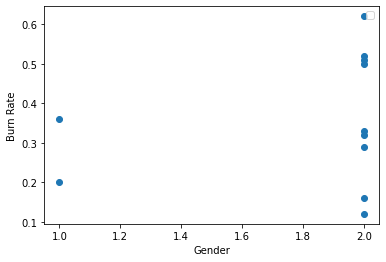

Score : 0.00000398


In [5]:
# Testing 'Gender' varibable for any relation with the dependent variable

gender = LinearRegression(dataset,'Gender','Burn Rate')
gender.train()
gender.plotGraph()
print("Score : %.8f" % gender.score())

No handles with labels found to put in legend.


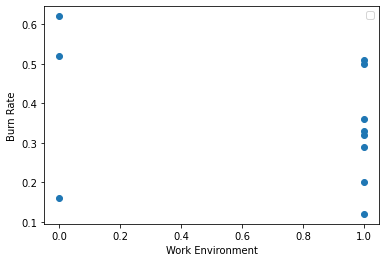

Score : 0.09435241


In [6]:
# Testing 'Work Environment' varibable for any relation with the dependent variable

work_environment = LinearRegression(dataset,'Work Environment','Burn Rate')
work_environment.train()
work_environment.plotGraph()
print("Score : %.8f" % work_environment.score())

No handles with labels found to put in legend.


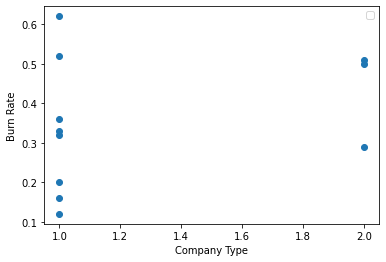

Score : 0.00003485


In [7]:
# Testing 'Company Type' varibable for any relation with the dependent variable

company_type = LinearRegression(dataset,'Company Type','Burn Rate')
company_type.train()
company_type.plotGraph()
print("Score : %.8f" % company_type.score())

No handles with labels found to put in legend.


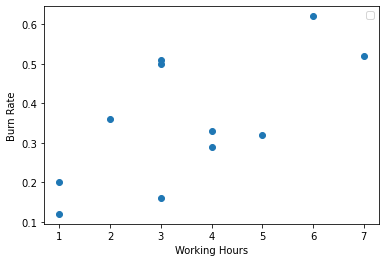

Score : 0.73103329


In [8]:
# Testing 'Working Hours' varibable for any relation with the dependent variable

work_hrs = LinearRegression(dataset,'Working Hours','Burn Rate')
work_hrs.train()
work_hrs.plotGraph()
print("Score : %.8f" % work_hrs.score())

No handles with labels found to put in legend.


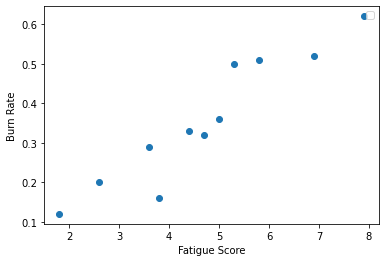

Score : 0.89186974


In [9]:
# Testing 'Mental Fatigue Score' varibable for any relation with the dependent variable

fatigue = LinearRegression(dataset,'Fatigue Score','Burn Rate')
fatigue.train()
fatigue.plotGraph()
print("Score : %.8f" % fatigue.score())

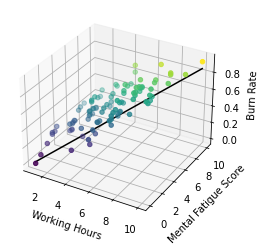

y = -0.00946 + 0.02927 X1 + 0.05767 X2
Root Mean Square Error : 0.06289
Variance Score         : 0.90


In [10]:
# Training the Multiple Regression Model using the selected independent variable

x = MultipleRegression(dataset,'Working Hours','Fatigue Score','Burn Rate')

x.train()
x.plotGraph()   

print("y =",round(x.b0[0],5),"+",round(x.b1[0],5),"X1","+",round(x.b2[0],5),"X2")
print("Root Mean Square Error :",round(x.rmse[0],5))
print("Variance Score         : %.2f"%round(x.score()[0],2))

In [11]:
print("\n\nFor a employee who works 8 hours under 3.0 Mental Fatigue has ",round(x.predict(8, 3)[0] * 100,0) , "% chance of quitting the job")



For a employee who works 8 hours under 3.0 Mental Fatigue has  40.0 % chance of quitting the job
